In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [3]:
def calcSqDistances(X, Kmus):
    sqDmat = []
    for mean in Kmus:
        norm_array = []
        for point in X:
            norm_array.append(np.linalg.norm(point - mean))
        sqDmat.append(norm_array)
    return np.array(sqDmat).T

In [4]:
def determineRnk(sqDmat):
    mean_rank = []
    for i in sqDmat:
        cluster_val = []
        for j in i: 
            closest = i.min()
            if j == closest:
                cluster_val.append(1)
            else: 
                cluster_val.append(0)
        mean_rank.append(cluster_val)
    return np.array(mean_rank)

In [5]:
def recalcMus(X, Rnk):
    # Fill this
    N = np.shape(X)[0]
    k = np.shape(Rnk)[1]
    
    Kmus = np.zeros((k,2))
    
    for i in range(k):
        cluster_sum = 0
        count = 0
        
        for j in range(N):
            cluster_sum += Rnk[j][i]*X[j]
            count += Rnk[j][i]
        Kmus[i] = cluster_sum/count
    return Kmus

In [83]:
def runKMeans(K, X_col, Y_col):
    # Load cleaned data in
    data = pd.read_csv("encoded_smartphone_data.csv")
    
    #break the columns into lists of their own and combine then into one array
    x_col = data[X_col]
    y_col = data[Y_col]
    dimensions = []
    
    for num in range(0,len(data[X_col])):
        dimensions.append([x_col[num], y_col[num]])
    
    dimensions = np.array(dimensions)
    
    X = dimensions 
    
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector 
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);

        # given the matrix of squared distances, determine the closest cluster center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        # If old cluster means are relatively close to the new cluster means,then break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    plotCurrent(X,Rnk,Kmus)

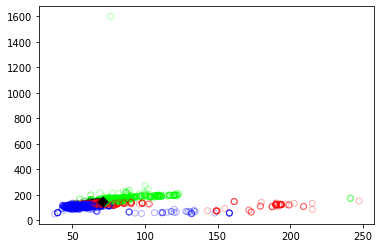

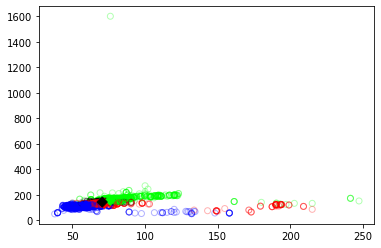

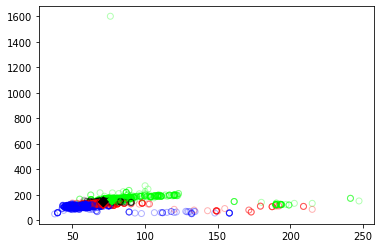

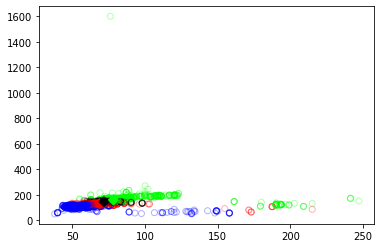

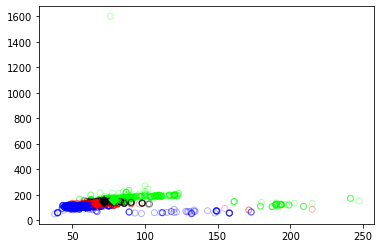

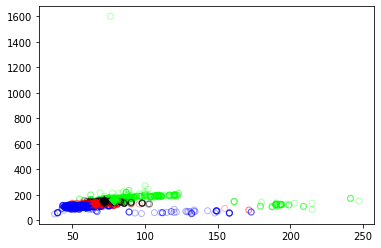

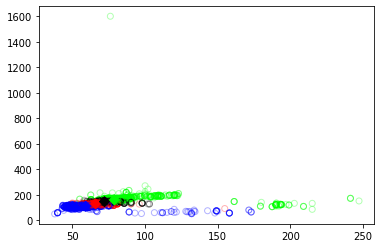

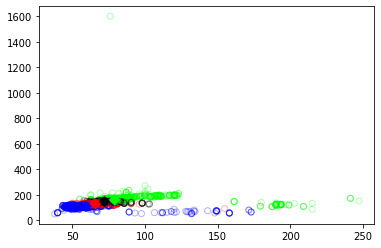

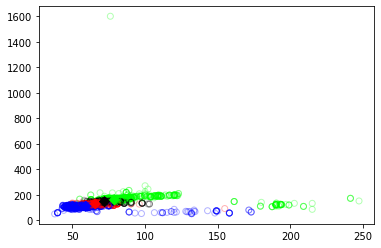

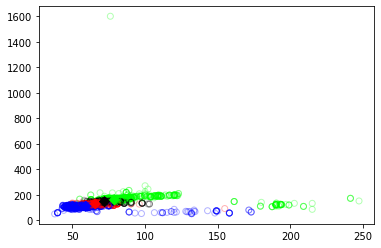

In [100]:
runKMeans(4, 'Width', 'Height')

In [95]:
data = pd.read_csv("encoded_smartphone_data.csv")

In [96]:
data.columns.unique()

Index(['Unnamed: 0', 'Brand', 'Model', 'Added', 'Width', 'Height', 'Depth',
       'Volume', 'Band Count', 'RAM_TYPE_DDR SDRAM',
       ...
       'ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress',
       'ProtectionFromLiquids_6 Protection against powerful jets of water',
       'ProtectionFromLiquids_7 Protected against immersion up to 1m of depth',
       'ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth',
       'ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs',
       'ProtectionFromLiquids_Non-standard protection',
       'ProtectionFromLiquids_Yes', 'DataIntegrity_Final',
       'DataIntegrity_Incomplete', 'DataIntegrity_Preliminary'],
      dtype='object', length=153)